In [1]:
#import packages
import pandas as pd,numpy as np
import numpy as np
import pandas as pd
import re
import os
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,Conv1D,Concatenate
from tensorflow.keras.models import Model
from tensorflow.python.client import device_lib
import datetime
import keras
%load_ext tensorboard

from keras_preprocessing.image import ImageDataGenerator

## Data Handling

In [2]:
temp=os.listdir("damaged")
filename=[]
for i in temp:
    filename.extend(["damaged/"+i+"/"+k for k in os.listdir("damaged/"+i)])
    
data1=pd.DataFrame(filename)
data1["target"]=[0 for i in range(len(filename))]

temp=os.listdir("intact")
filename=[]
for i in temp:
    filename.extend(["intact/"+i+"/"+k for k in os.listdir("intact/"+i)])

data2=pd.DataFrame(filename)
data2["target"]=[1 for i in range(len(filename))]

data=pd.concat([data1,data2],ignore_index=True)
data.columns=["image","target"]

# Data Generator

In [3]:
ImageFlow = ImageDataGenerator()
TrainGenerator=ImageFlow.flow_from_dataframe(dataframe=data, x_col="image", y_col="target",shuffle=True,\
                                             class_mode="raw", target_size=(224,224), batch_size=10)#,\

z=os.listdir("test_images")

test_data=pd.DataFrame()
test_data["image"]=["test_images/"+i for i in z]
test_data["target"]=[1 for i in z]

TestImageGenerator=ImageFlow.flow_from_dataframe(dataframe=test_data, x_col="image", y_col="target",shuffle=False,\
                                             class_mode="raw", target_size=(224,224), batch_size=1)

Found 400 validated image filenames.
Found 265 validated image filenames.


# Pretrained Model

In [12]:
basemodel=tf.keras.applications.vgg16.VGG16(
    include_top=True, weights='imagenet',input_shape=(224,224,3))

basemodel.trainable = False
for i in range(0,3):
    basemodel.layers[-i].trainable=True

# Defining Model Architecture 

In [48]:
input_layer = tf.keras.Input(shape=(224,224, 3))

layer1=basemodel(input_layer)

layer4=tf.keras.layers.Dense(
    500,
    activation='relu',
    kernel_initializer=tf.keras.initializers.he_uniform(),
)(layer1)

drop=tf.keras.layers.Dropout(0.3)(layer4)
layer5=tf.keras.layers.Dense(
    20,
    activation='relu',
    kernel_initializer=tf.keras.initializers.he_uniform(),
)(drop)

output= Dense(1,activation='sigmoid',kernel_initializer=tf.keras.initializers.he_uniform())(layer5)

model=Model(input_layer,outputs=output)

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss="BinaryCrossentropy",metrics=['Precision','accuracy'])

In [49]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense_15 (Dense)            (None, 500)               500500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_16 (Dense)            (None, 20)                10020     
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 138,868,085
Trainable params: 510,541
Non-tra

# *Model Training* (stage-3)

In [57]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

model.fit(TrainGenerator,batch_size=10,epochs=200,callbacks=tensorboard_callback)

Epoch 1/200
40/40 [==============================] - 19s 447ms/step - loss: 0.2140 - precision: 0.9069 - accuracy: 0.9150
Epoch 2/200
40/40 [==============================] - 18s 447ms/step - loss: 0.2397 - precision: 0.8738 - accuracy: 0.8850
Epoch 3/200
40/40 [==============================] - 17s 431ms/step - loss: 0.2047 - precision: 0.9150 - accuracy: 0.9150
Epoch 4/200
40/40 [==============================] - 18s 437ms/step - loss: 0.2085 - precision: 0.8986 - accuracy: 0.9125
Epoch 5/200
40/40 [==============================] - 17s 424ms/step - loss: 0.2084 - precision: 0.9005 - accuracy: 0.9025
Epoch 6/200
40/40 [==============================] - 17s 429ms/step - loss: 0.2268 - precision: 0.8932 - accuracy: 0.9050
Epoch 7/200
40/40 [==============================] - 18s 437ms/step - loss: 0.2232 - precision: 0.9036 - accuracy: 0.8975
Epoch 8/200
40/40 [==============================] - 17s 430ms/step - loss: 0.2014 - precision: 0.8791 - accuracy: 0.9075
Epoch 9/200
40/40 [=====

40/40 [==============================] - 7s 177ms/step - loss: 0.1804 - precision: 0.9208 - accuracy: 0.9250
Epoch 69/200
40/40 [==============================] - 7s 172ms/step - loss: 0.1863 - precision: 0.8971 - accuracy: 0.9050
Epoch 70/200
40/40 [==============================] - 7s 174ms/step - loss: 0.2001 - precision: 0.8957 - accuracy: 0.9175
Epoch 71/200
40/40 [==============================] - 7s 180ms/step - loss: 0.1849 - precision: 0.9171 - accuracy: 0.9275
Epoch 72/200
40/40 [==============================] - 7s 173ms/step - loss: 0.2066 - precision: 0.8981 - accuracy: 0.9100
Epoch 73/200
40/40 [==============================] - 7s 169ms/step - loss: 0.1853 - precision: 0.9034 - accuracy: 0.9175
Epoch 74/200
40/40 [==============================] - 7s 166ms/step - loss: 0.1942 - precision: 0.9104 - accuracy: 0.9125
Epoch 75/200
40/40 [==============================] - 7s 173ms/step - loss: 0.1986 - precision: 0.8868 - accuracy: 0.9100
Epoch 76/200
40/40 [=================

Epoch 135/200
40/40 [==============================] - 7s 174ms/step - loss: 0.1899 - precision: 0.9200 - accuracy: 0.9200
Epoch 136/200
40/40 [==============================] - 7s 169ms/step - loss: 0.1566 - precision: 0.9220 - accuracy: 0.9325
Epoch 137/200
40/40 [==============================] - 7s 173ms/step - loss: 0.1793 - precision: 0.9126 - accuracy: 0.9250
Epoch 138/200
40/40 [==============================] - 7s 181ms/step - loss: 0.1952 - precision: 0.9034 - accuracy: 0.9175
Epoch 139/200
40/40 [==============================] - 7s 173ms/step - loss: 0.1767 - precision: 0.9183 - accuracy: 0.9350
Epoch 140/200
40/40 [==============================] - 7s 170ms/step - loss: 0.1605 - precision: 0.9300 - accuracy: 0.9300
Epoch 141/200
40/40 [==============================] - 7s 174ms/step - loss: 0.1636 - precision: 0.9212 - accuracy: 0.9275
Epoch 142/200
40/40 [==============================] - 7s 169ms/step - loss: 0.1715 - precision: 0.9073 - accuracy: 0.9175
Epoch 143/200
40

# Loading Model

In [4]:
model = keras.models.load_model("finalmodel")

# Plotting Model Architecture

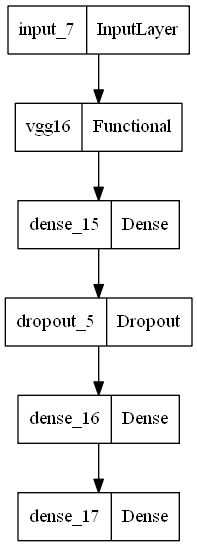

In [5]:
tf.keras.utils.plot_model(model)

# LIVE DEMO

In [6]:
def predict(array):
    x=model.predict(array.reshape(1,array.shape[0],array.shape[1],array.shape[2]))
    if x<0.5:
        print("According to the Model, the object is Damaged with a probability of ",round(100*(1-x[0][0]),4),"%.")
    else:
        print("According to the Model, the object is Intact with a probability of ",round(100*(x[0][0]),4),"%.")
    
def model_predict(num):

    test_data=pd.DataFrame()
    test_data["image"]=["test_images/"+str(num)+".png"]
    test_data["target"]=[1]

    TestImageGenerator=ImageFlow.flow_from_dataframe(dataframe=test_data, x_col="image", y_col="target",shuffle=False,\
                                             class_mode="raw", target_size=(224,224), batch_size=1)
    
    i=TestImageGenerator[0][0][0]
    plt.title("Input to the model")
    plt.imshow(i.astype('uint8'))
    
    plt.figure(figsize=(10,10))
    z=cv2.imread("test_images/"+str(num)+".png")
    plt.title("Real Image")
    plt.imshow(z)
    plt.show()
    predict(i)

## Classification given the image number

35
Found 1 validated image filenames.


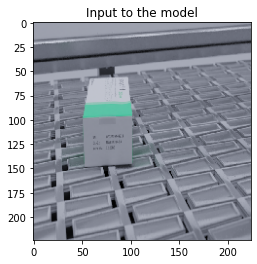

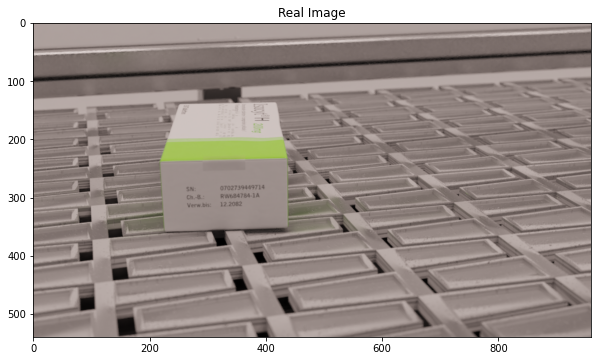

According to the Model, the object is Intact with a probability of  99.3404 %.


In [19]:
num=int(input())
model_predict(num)

## Random Predictor
- Takes a random image and predicts the class for that image

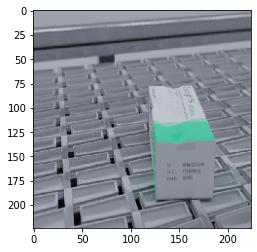

According to the Model, the object is Damaged with a probability of  100.0 %.


In [7]:
i=TrainGenerator[np.random.randint(0,40)][0][np.random.randint(0,10)]
plt.imshow(i.astype('uint8'))
plt.show()
predict(i)

- With preview

Random Number generator is  65
Found 1 validated image filenames.


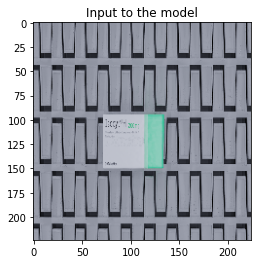

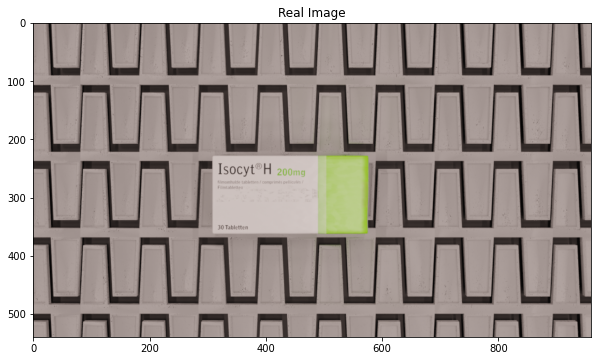

According to the Model, the object is Intact with a probability of  99.883 %.


In [11]:
num=np.random.randint(0,265)
print("Random Number generator is ",num)
model_predict(num)